In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

import math
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

# For Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [3]:
power = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'Date_Time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='Date_Time')

In [4]:
power.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
power.sample(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-18 20:25:00,3.304,0.058,234.85,14.0,0.0,0.0,17.0
2007-02-01 17:59:00,2.434,0.296,236.59,10.2,0.0,2.0,17.0
2006-12-18 11:14:00,1.494,0.312,238.44,6.4,0.0,2.0,18.0
2007-02-02 09:16:00,1.344,0.070,238.96,5.6,0.0,0.0,18.0
2007-01-26 06:02:00,0.334,0.160,247.44,1.4,0.0,0.0,0.0


In [6]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97195 entries, 2006-12-16 17:24:00 to 2007-02-22 05:01:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    97188 non-null  float64
 1   Global_reactive_power  97188 non-null  float64
 2   Voltage                97188 non-null  float64
 3   Global_intensity       97188 non-null  float64
 4   Sub_metering_1         97188 non-null  float64
 5   Sub_metering_2         97188 non-null  float64
 6   Sub_metering_3         97188 non-null  float64
dtypes: float64(7)
memory usage: 5.9 MB


In [7]:
power.shape

(97195, 7)

In [8]:
power.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [9]:
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,97188.000000,97188.00000,97188.000000,97188.000000,97188.000000,97188.000000,97188.000000
mean,1.651759,0.12924,240.849239,6.983436,1.339548,1.917438,7.489762
std,1.340672,0.11765,3.471399,5.651624,6.750034,7.628342,8.664770
min,0.194000,0.00000,224.680000,0.800000,0.000000,0.000000,0.000000
25%,0.398000,0.00000,238.530000,1.800000,0.000000,0.000000,0.000000
50%,1.422000,0.11600,241.090000,5.800000,0.000000,0.000000,0.000000
75%,2.422000,0.19800,243.330000,10.000000,0.000000,1.000000,17.000000
max,9.272000,0.87400,251.700000,40.400000,77.000000,78.000000,20.000000


In [10]:
power.isnull().sum()

Global_active_power      7
Global_reactive_power    7
Voltage                  7
Global_intensity         7
Sub_metering_1           7
Sub_metering_2           7
Sub_metering_3           7
dtype: int64

In [11]:
#  Deal with Missing Values
# Find All Columns Having nan:

droping_list_all=[]
for j in range(0,7):
    if not power.iloc[:, j].notnull().all():
        droping_list_all.append(j)

droping_list_all

[0, 1, 2, 3, 4, 5, 6]

<Axes: >

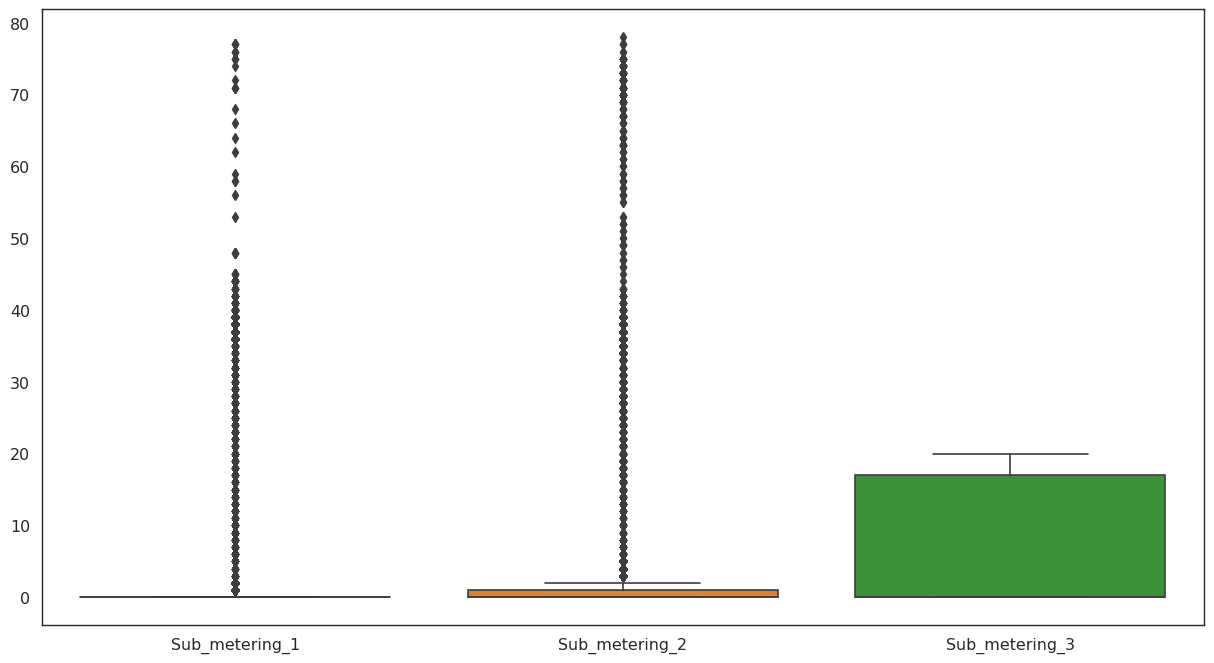

In [12]:
#  Plotting Boxplot For Checking Median & Mean Values To Fill Null Values.
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,4:])

<Axes: >

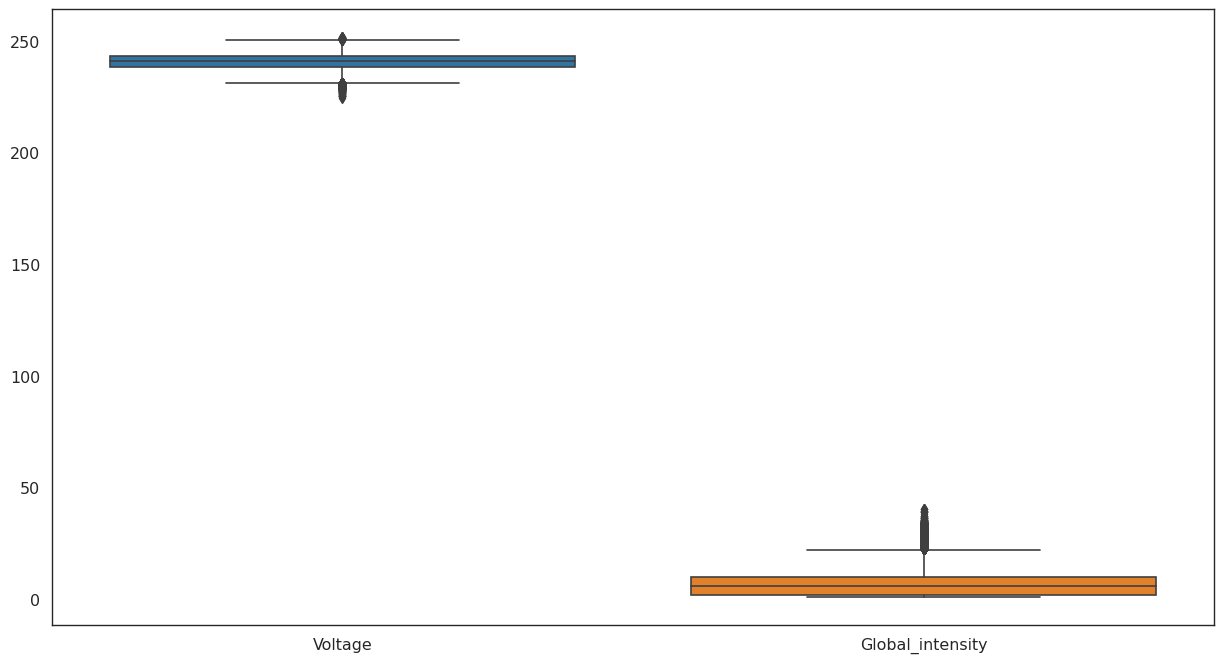

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,2:4])

<Axes: >

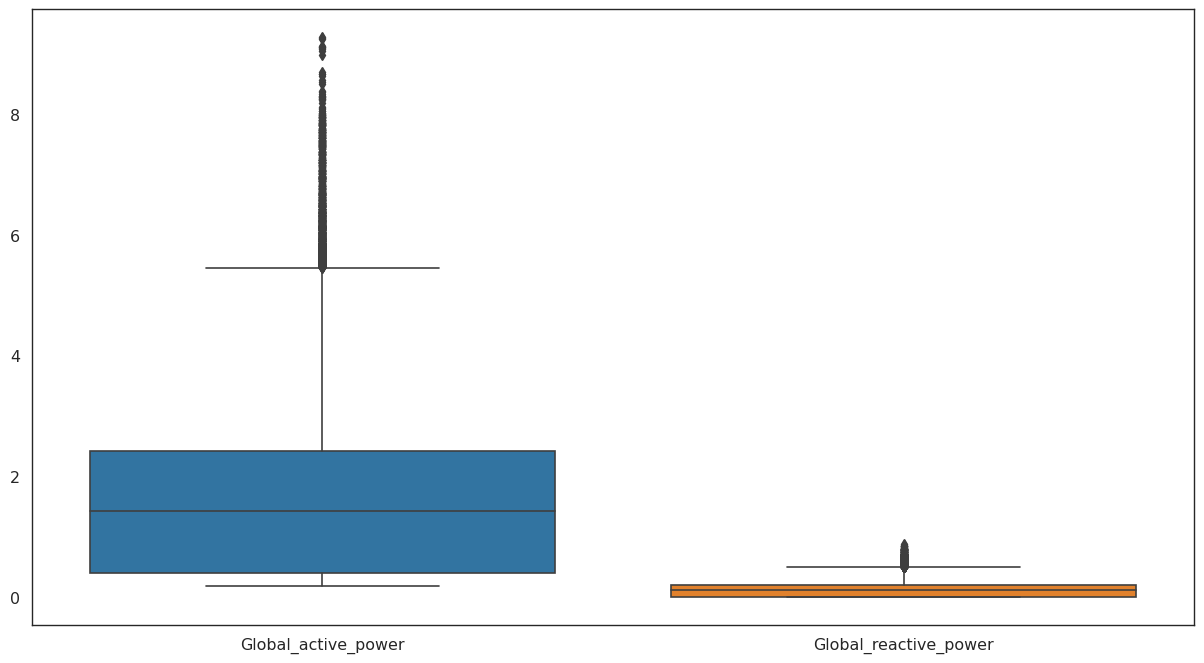

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,:2])

In [15]:
# Fill nan With Mean All Columns

for j in range(0,7):
        power.iloc[:,j]=power.iloc[:,j].fillna(power.iloc[:,j].mean())

In [16]:
#  Another Sanity Check To Make Sure That There Are Not More Any nan
power.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

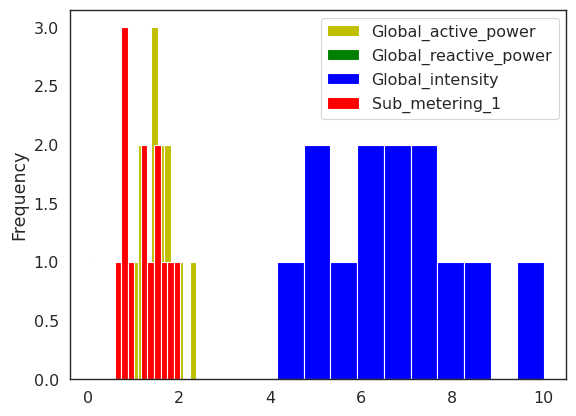

In [17]:
#  EDA
#  Data Visualization
#  Hist Plot Of The Mean Of Different Feature Resampled Over Month
power.Global_active_power.resample('M').mean().plot(kind='hist', color='y', legend=True )
power.Global_reactive_power.resample('M').mean().plot(kind='hist',color='g', legend=True)
power.Global_intensity.resample('M').mean().plot(kind='hist', color='b', legend=True)
power.Sub_metering_1.resample('M').mean().plot(kind='hist', color='r', legend=True)
plt.show()

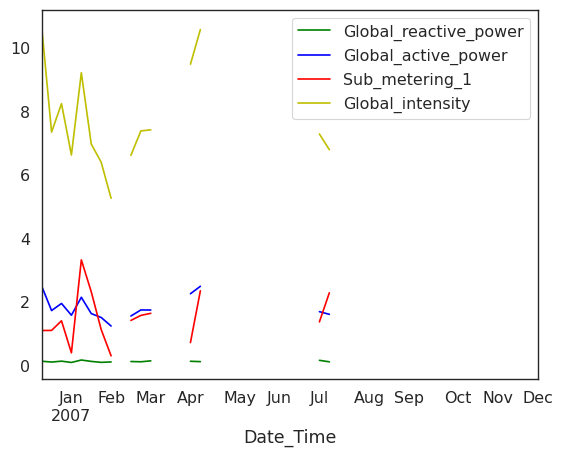

In [18]:
#  Resampling Over Week & Computing Mean
power.Global_reactive_power.resample('W').mean().plot(color='g', legend=True)
power.Global_active_power.resample('W').mean().plot(color='b', legend=True)
power.Sub_metering_1.resample('W').mean().plot(color='r', legend=True)
power.Global_intensity.resample('W').mean().plot(color='y', legend=True)
plt.show()

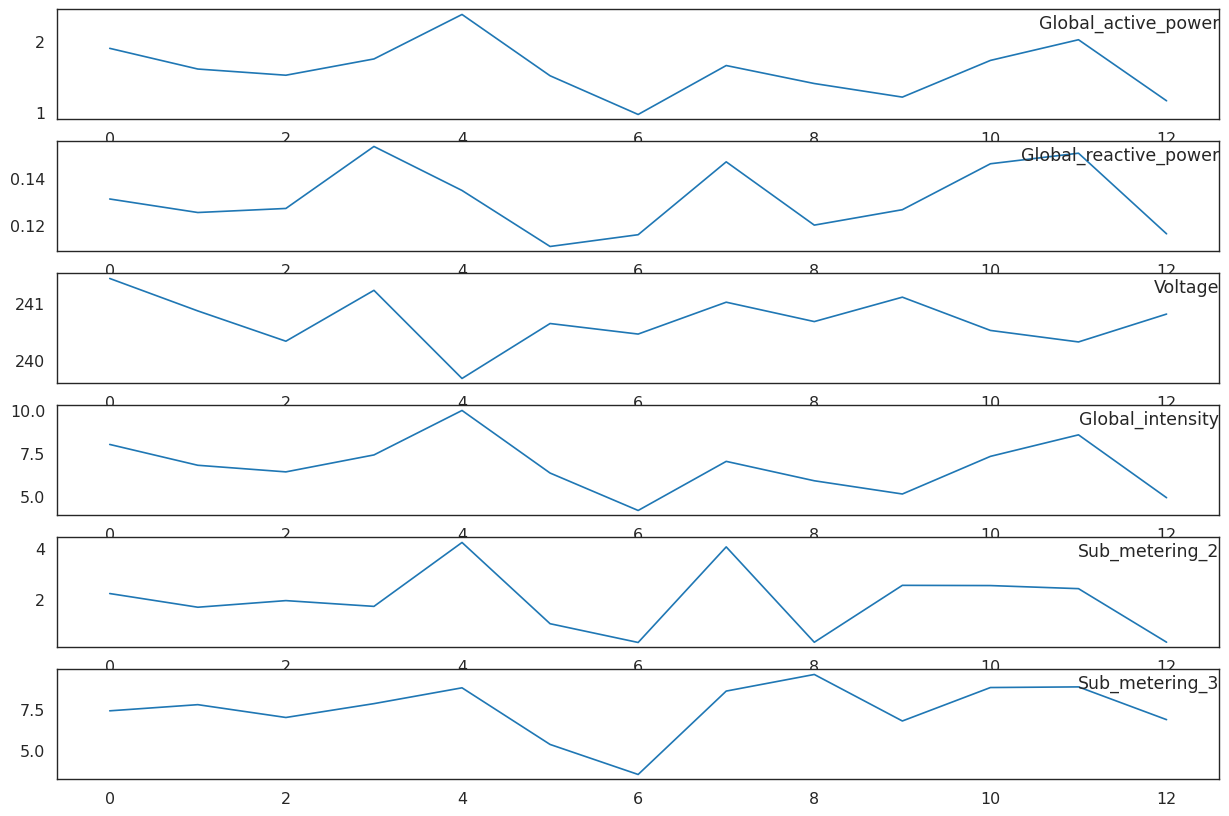

In [19]:
#  Resampling Over Month & Computing Mean
#  Specifying Columns To Plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('M').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

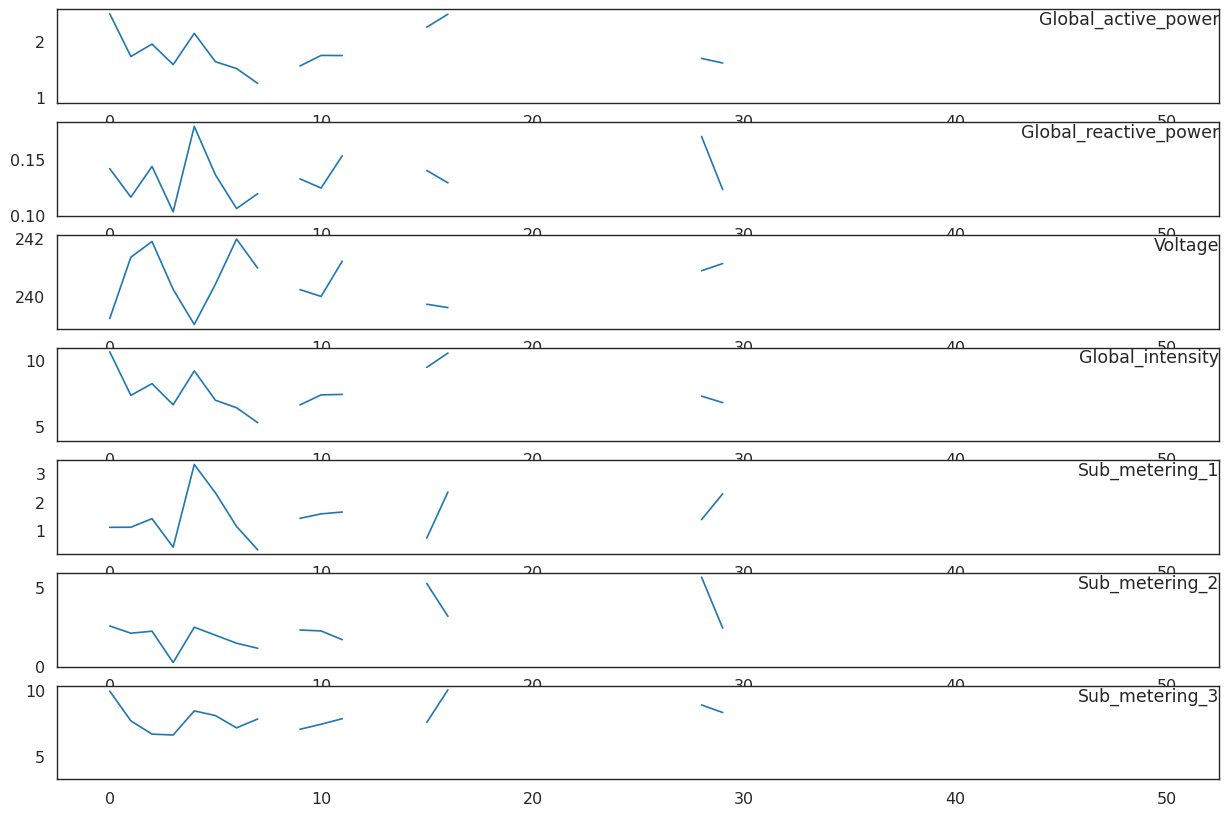

In [20]:
#  Resampling Over Week & Computing Mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = power.resample('W').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

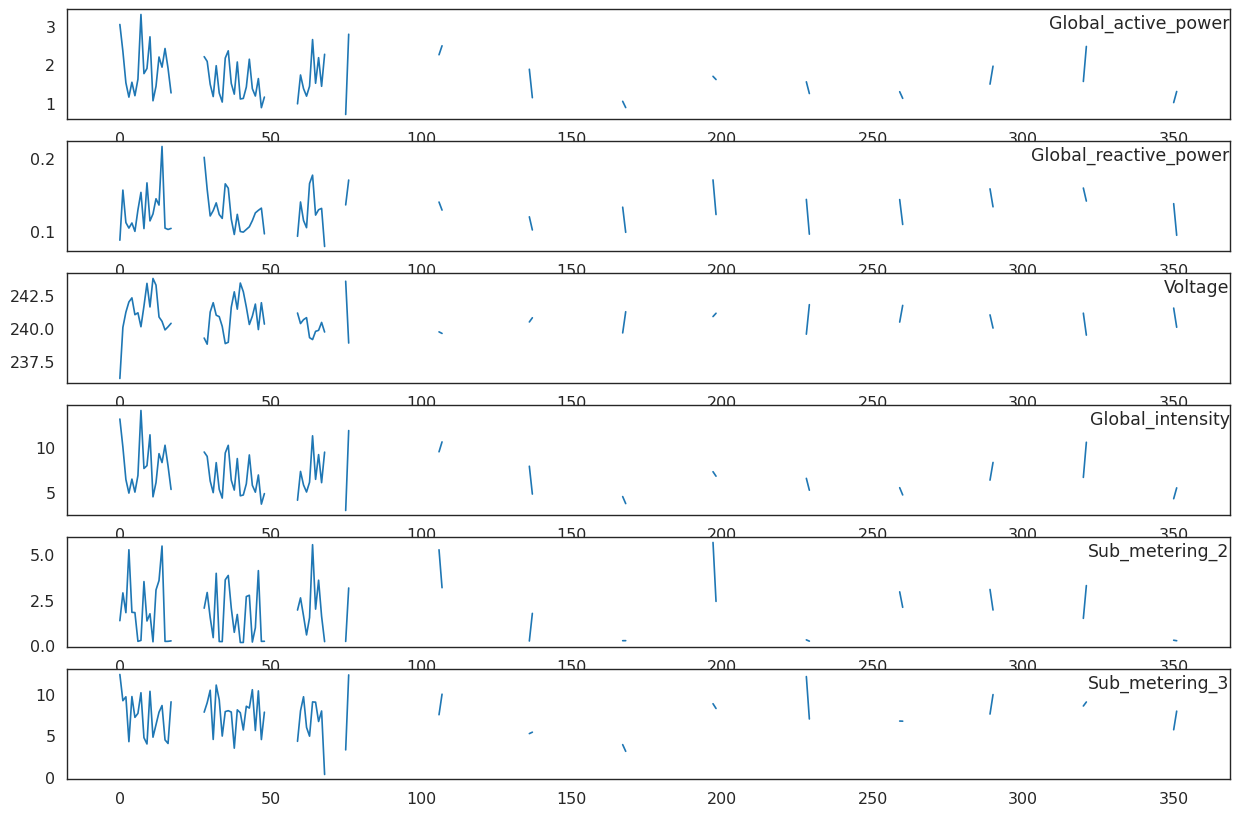

In [21]:
#  Comparing The Mean of Different Features Resampled Over Day
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('D').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [22]:
week_info = power.resample('W')
week = week_info.sum()

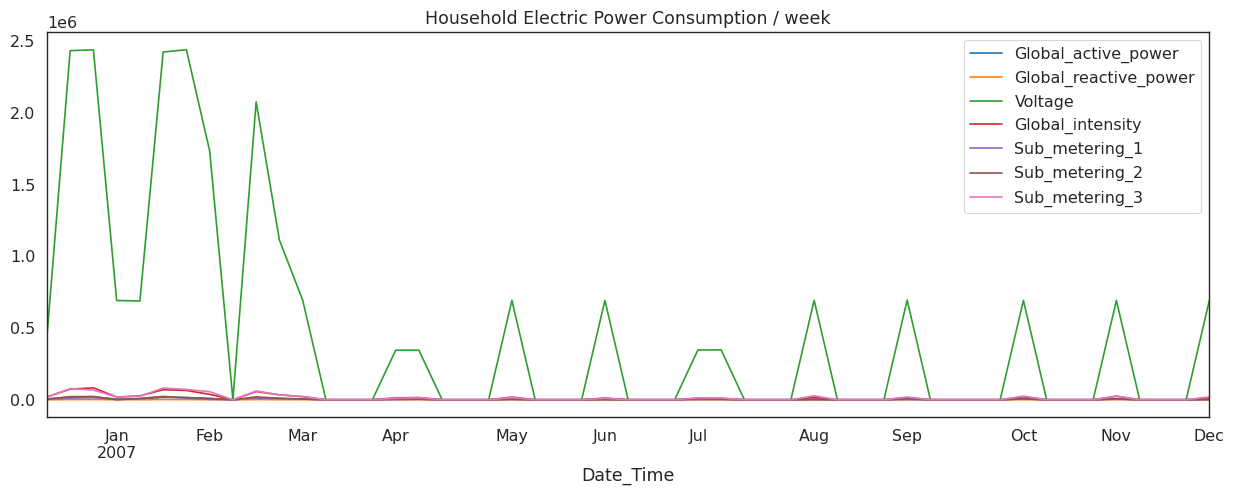

In [23]:
x = week.plot(title='Household Electric Power Consumption / week', figsize=(15,5))

In [24]:
daily_info = power.resample('D')
day = daily_info.sum()

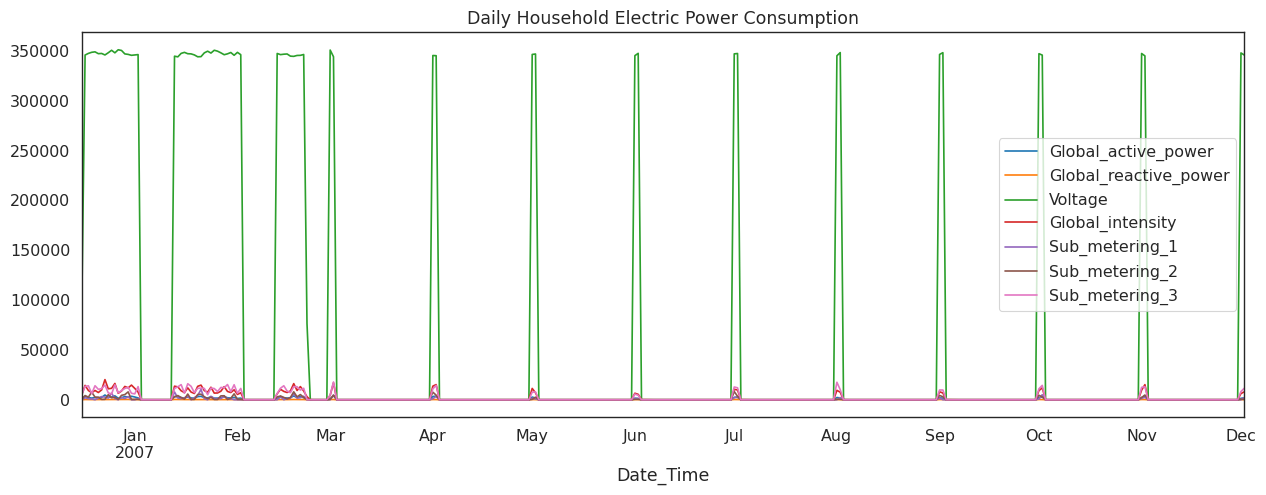

In [25]:
y = day.plot(title='Daily Household Electric Power Consumption', figsize=(15,5))

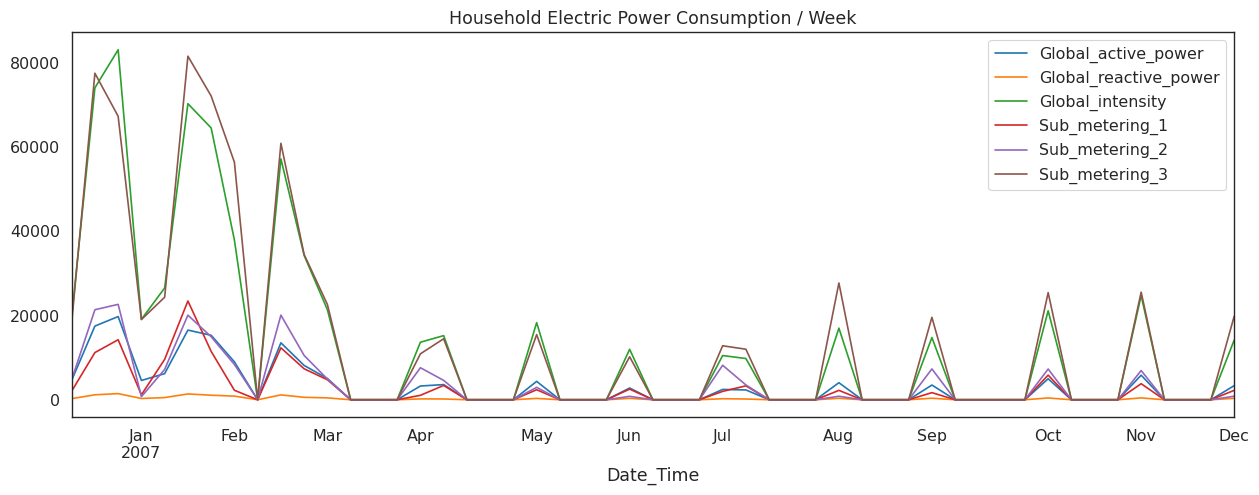

In [26]:
week_data = week.drop(columns=['Voltage'])
a = week_data.plot(title='Household Electric Power Consumption / Week', figsize=(15,5))

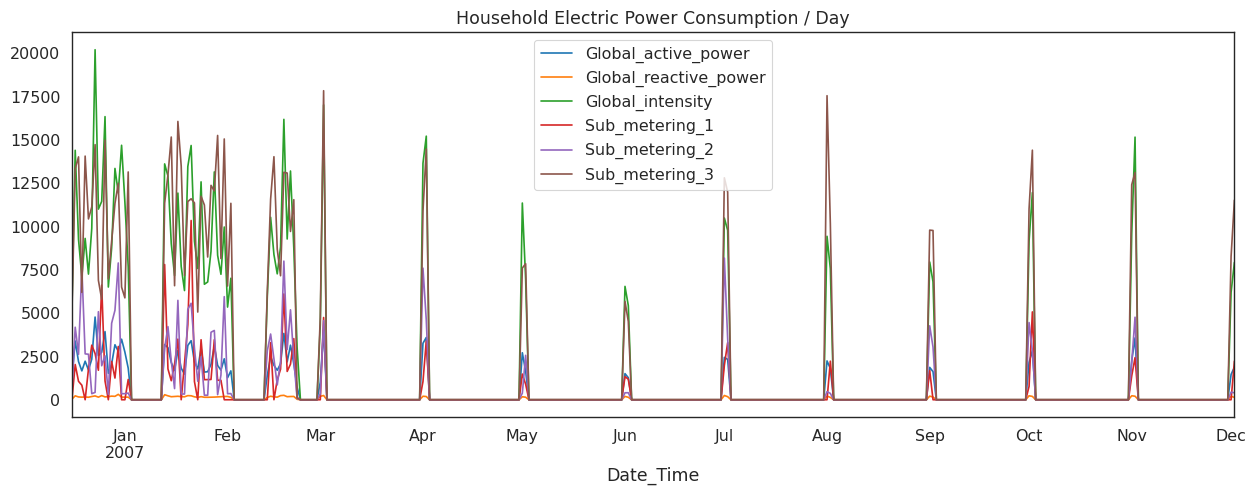

In [27]:
daily_data = day.drop(columns=['Voltage'])
b = daily_data.plot(title='Household Electric Power Consumption / Day', figsize=(15,5))

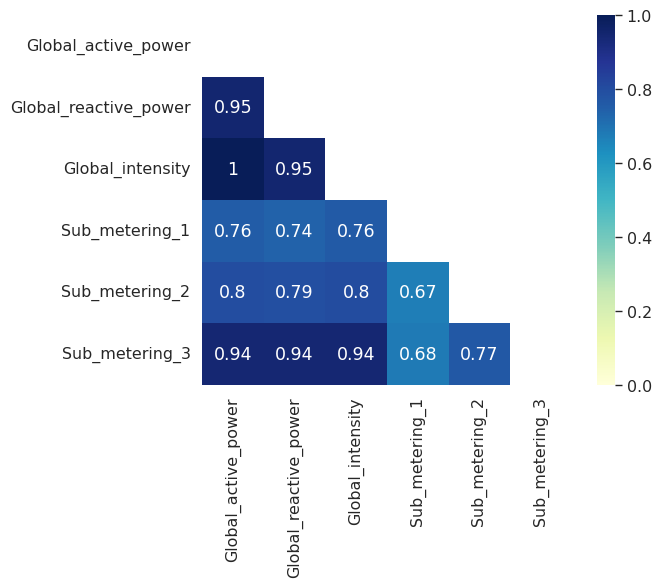

In [28]:
p = daily_data.corr(method='pearson')
mask = np.zeros_like(p)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(p, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

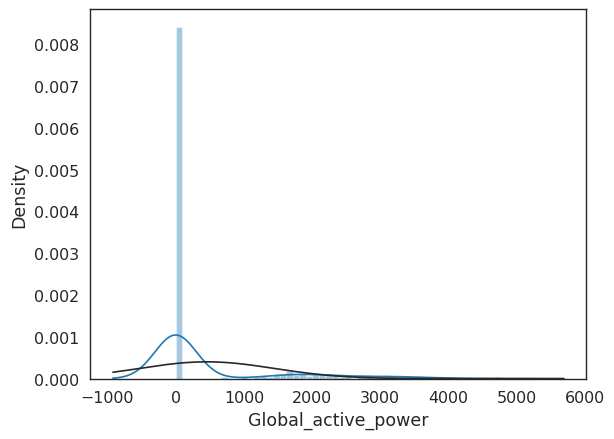

In [29]:
z = sns.distplot(daily_data['Global_active_power'], fit=norm, bins=50, kde=True);

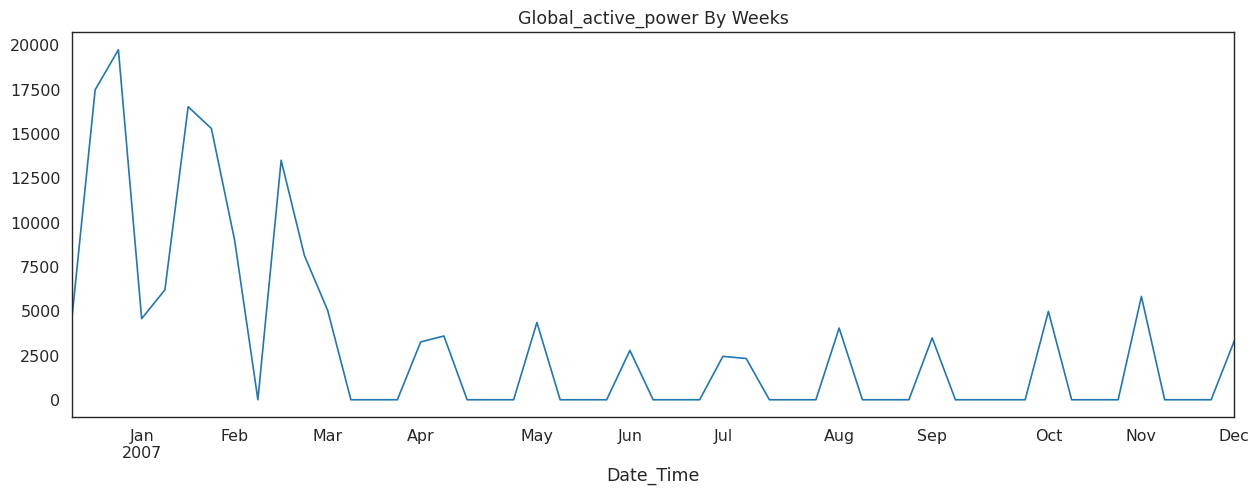

In [30]:
c = week_data.Global_active_power.plot(title='Global_active_power By Weeks', figsize=(15,5))

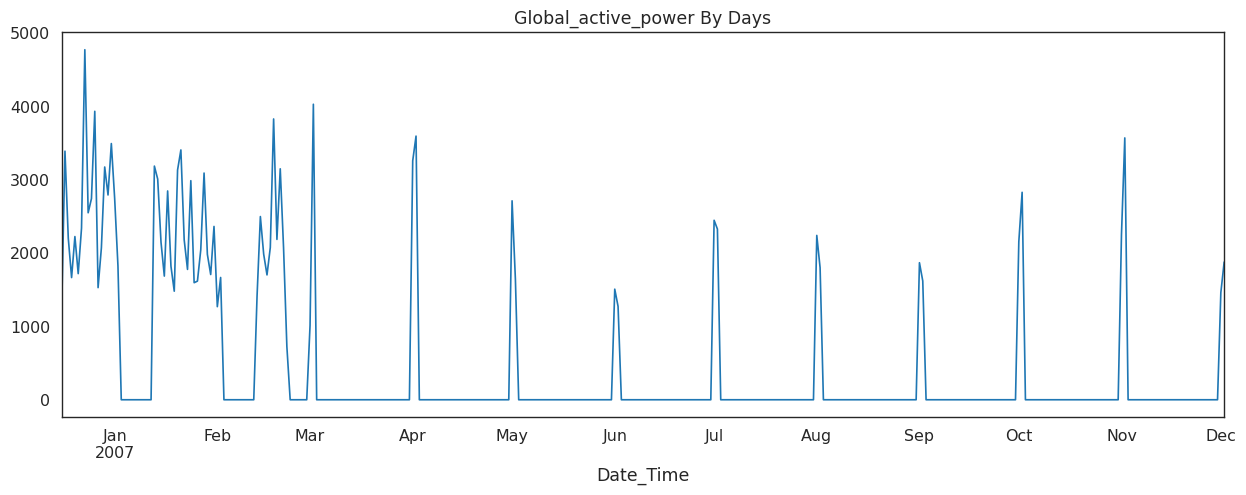

In [31]:
d = daily_data.Global_active_power.plot(title='Global_active_power By Days', figsize=(15,5))

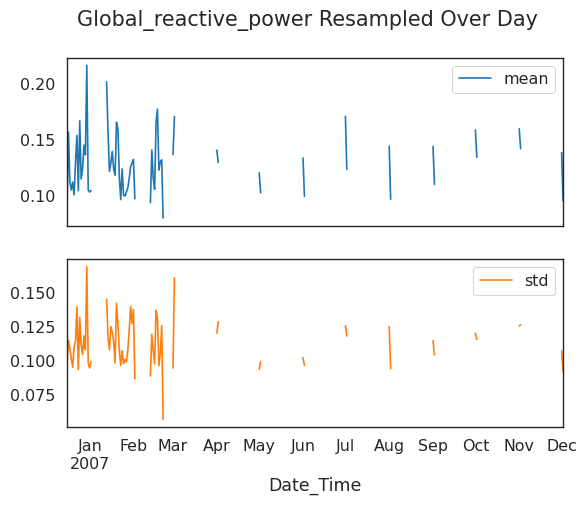

In [32]:
#  Standard Deviation & Mean of 'Global_reactive_power' Resampled Over Day
x1 = power.Global_reactive_power.resample('D').agg(['mean', 'std'])
x1.plot(subplots = True, title='Global_reactive_power Resampled Over Day')
plt.show()

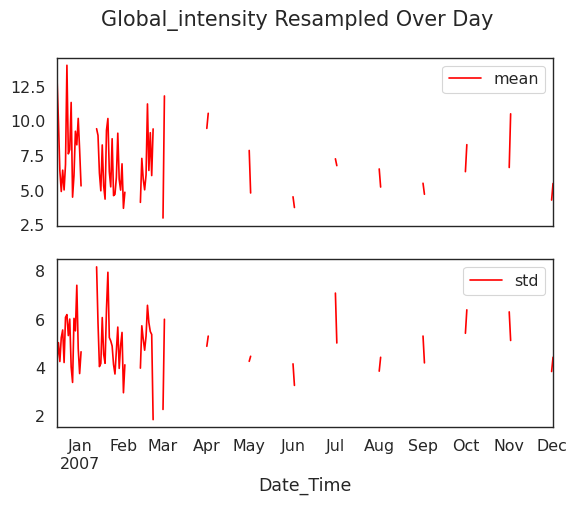

In [33]:
#  Standard Deviation & Mean of 'Global_intensity' Resampled Over Day
x2 = power.Global_intensity.resample('D').agg(['mean', 'std'])
x2.plot(subplots = True, title='Global_intensity Resampled Over Day', color='red')
plt.show()

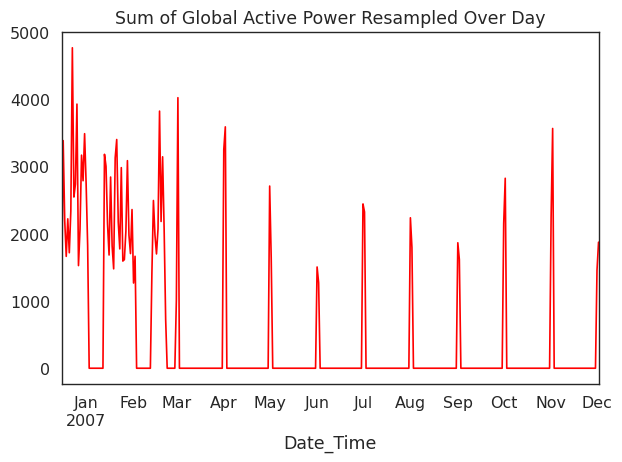

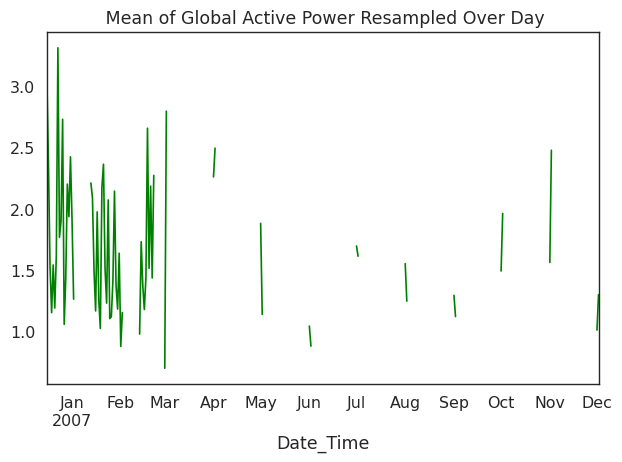

In [34]:
#  Resampling Over Day, & Showing The Mean & Sum of Global_active_power
power.Global_active_power.resample('D').sum().plot(title='Sum of Global Active Power Resampled Over Day', color='red')
plt.tight_layout()
plt.show()

power.Global_active_power.resample('D').mean().plot(title=' Mean of Global Active Power Resampled Over Day', color='green')
plt.tight_layout()
plt.show()

In [35]:
#  Calculating Power Consumed Per Month
#  Global_reactive_power
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().tail()

Date_Time
2007-08-31    346.464
2007-09-30    365.314
2007-10-31    421.426
2007-11-30    434.334
2007-12-31    335.844
Freq: M, Name: Global_reactive_power, dtype: float64

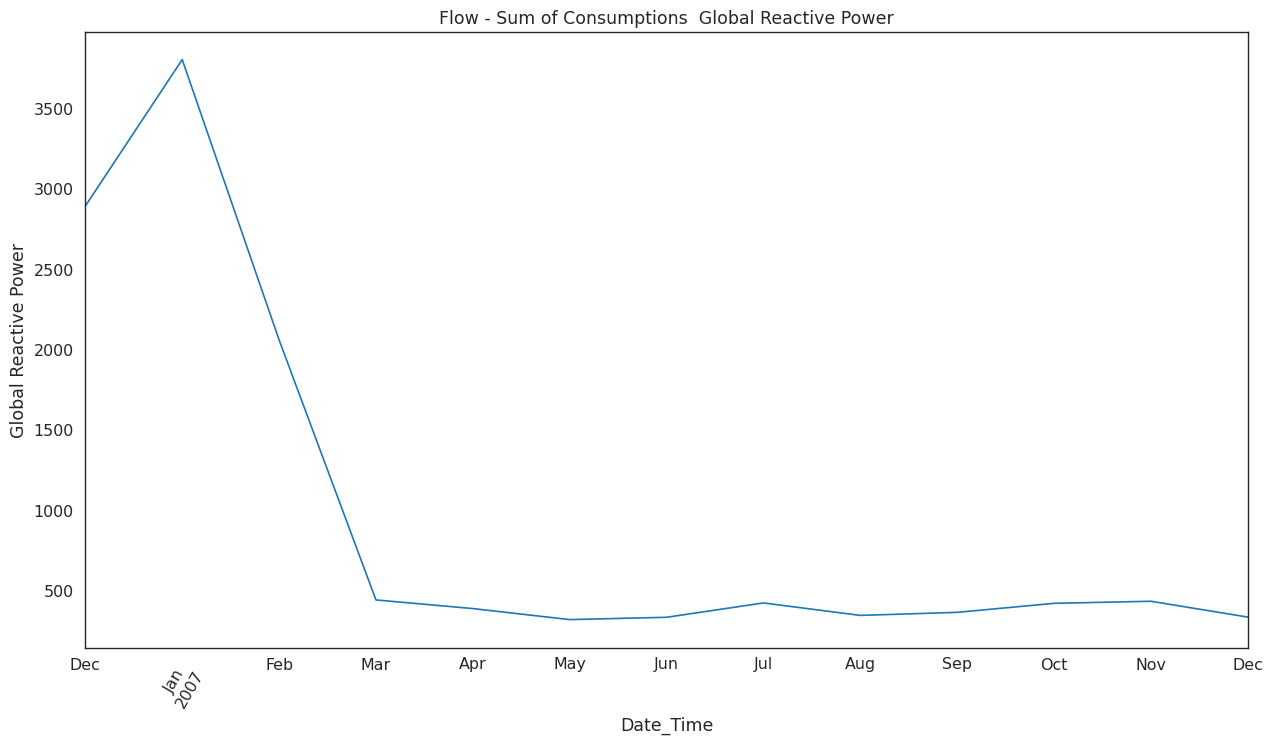

In [36]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow - Sum of Consumptions  Global Reactive Power')
plt.show()

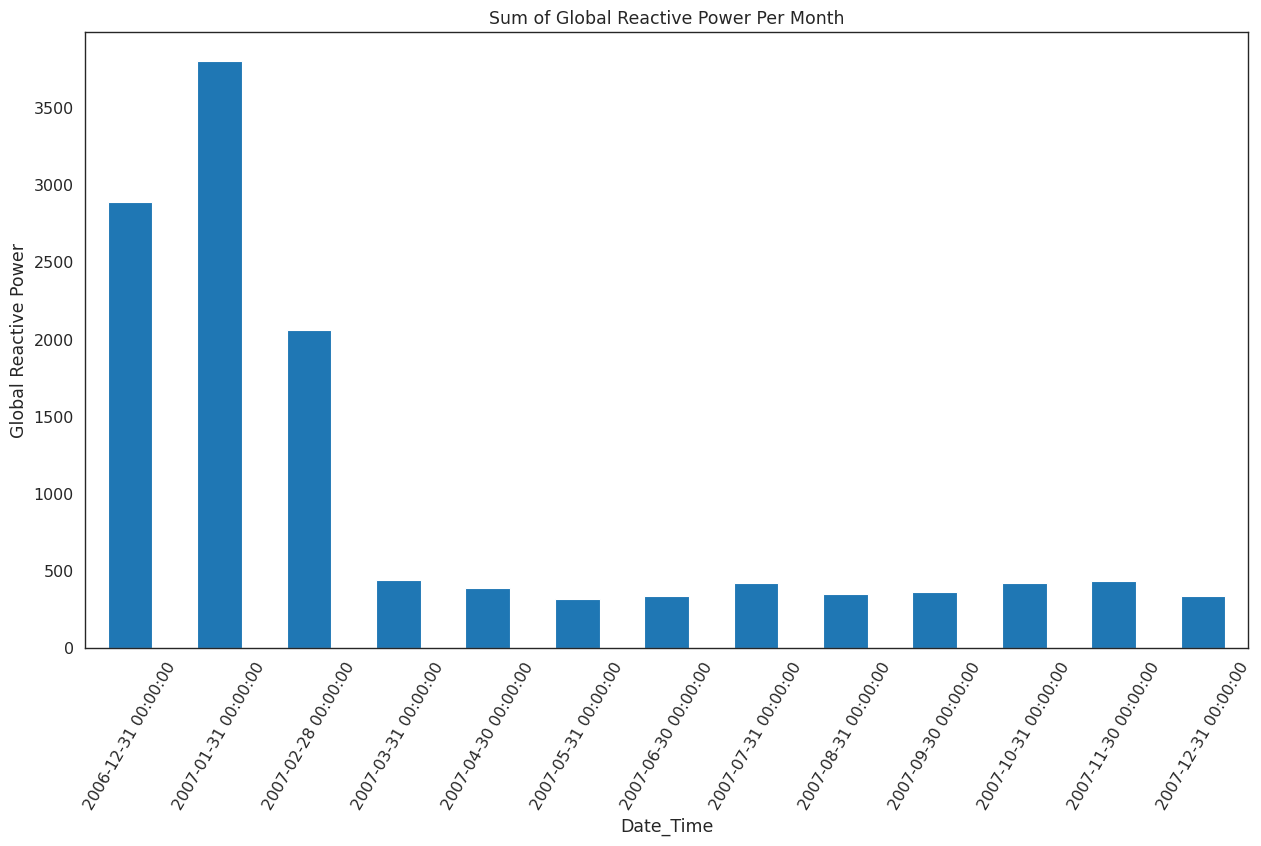

In [37]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Sum of Global Reactive Power Per Month')
plt.show()

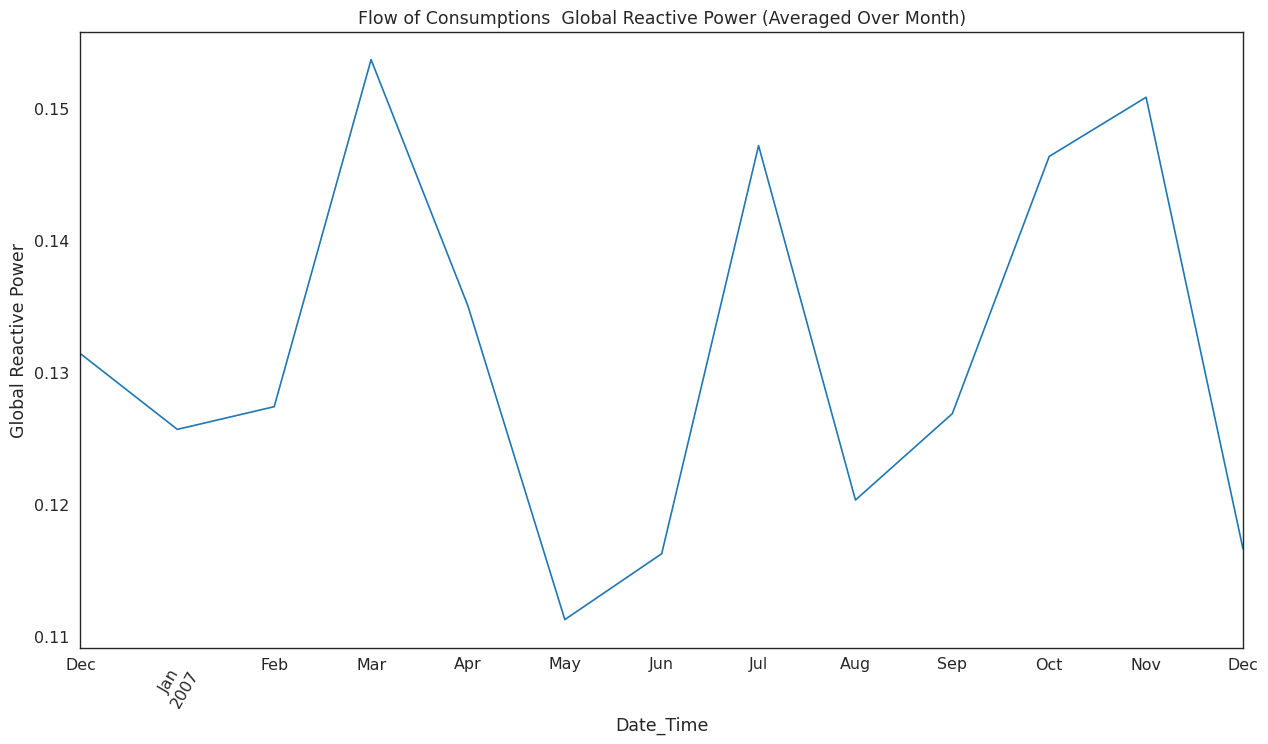

In [38]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow of Consumptions  Global Reactive Power (Averaged Over Month)')
plt.show()

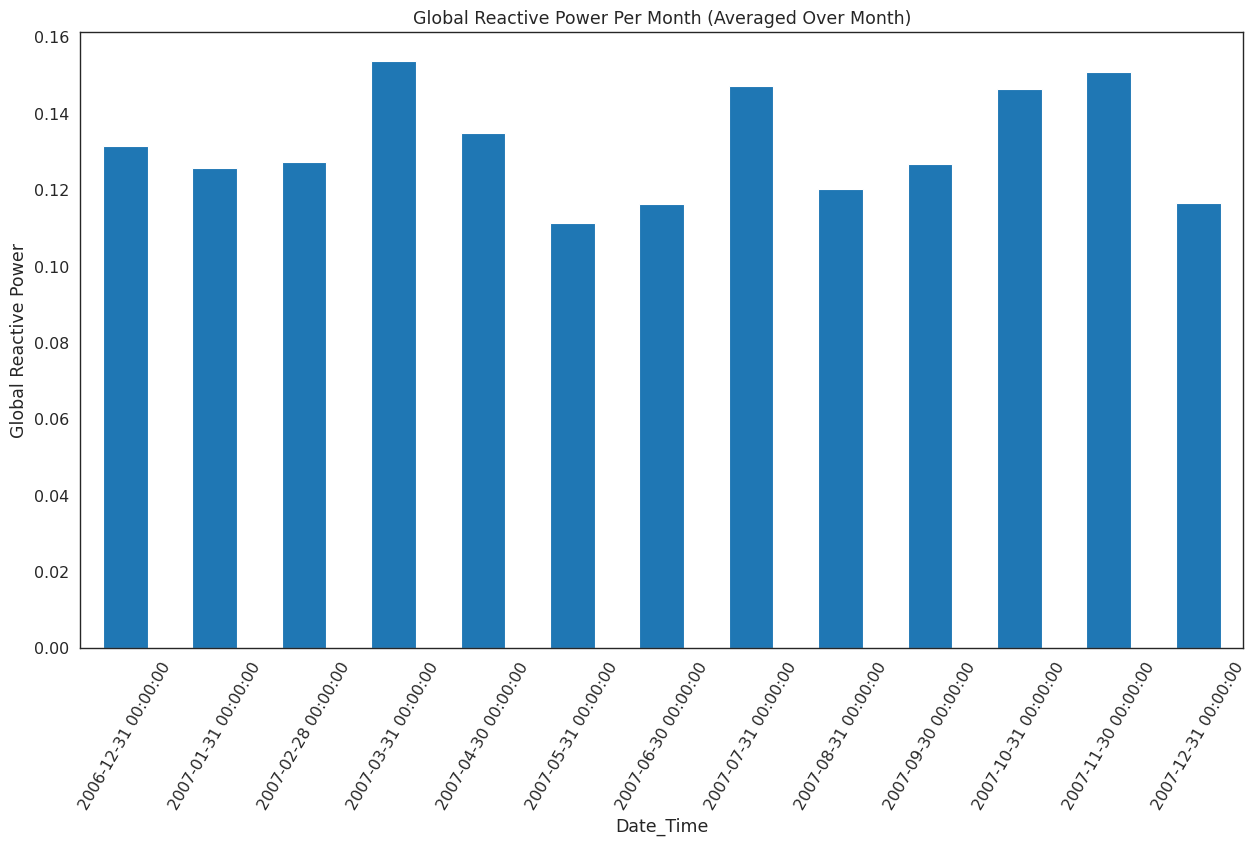

In [39]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Global Reactive Power Per Month (Averaged Over Month)')
plt.show()

In [40]:
#  Global_active_power
# Sum of 'Global_active_power' Resampled Over Month
power['Global_active_power'].resample('M').sum().tail()

Date_Time
2007-08-31    4042.774
2007-09-30    3489.252
2007-10-31    4984.128
2007-11-30    5826.422
2007-12-31    3338.906
Freq: M, Name: Global_active_power, dtype: float64

In [41]:
#  Mean of 'Global_active_power' Resampled Over Month
power['Global_active_power'].resample('M').mean().tail()

Date_Time
2007-08-31    1.403741
2007-09-30    1.211546
2007-10-31    1.730600
2007-11-30    2.023063
2007-12-31    1.159342
Freq: M, Name: Global_active_power, dtype: float64

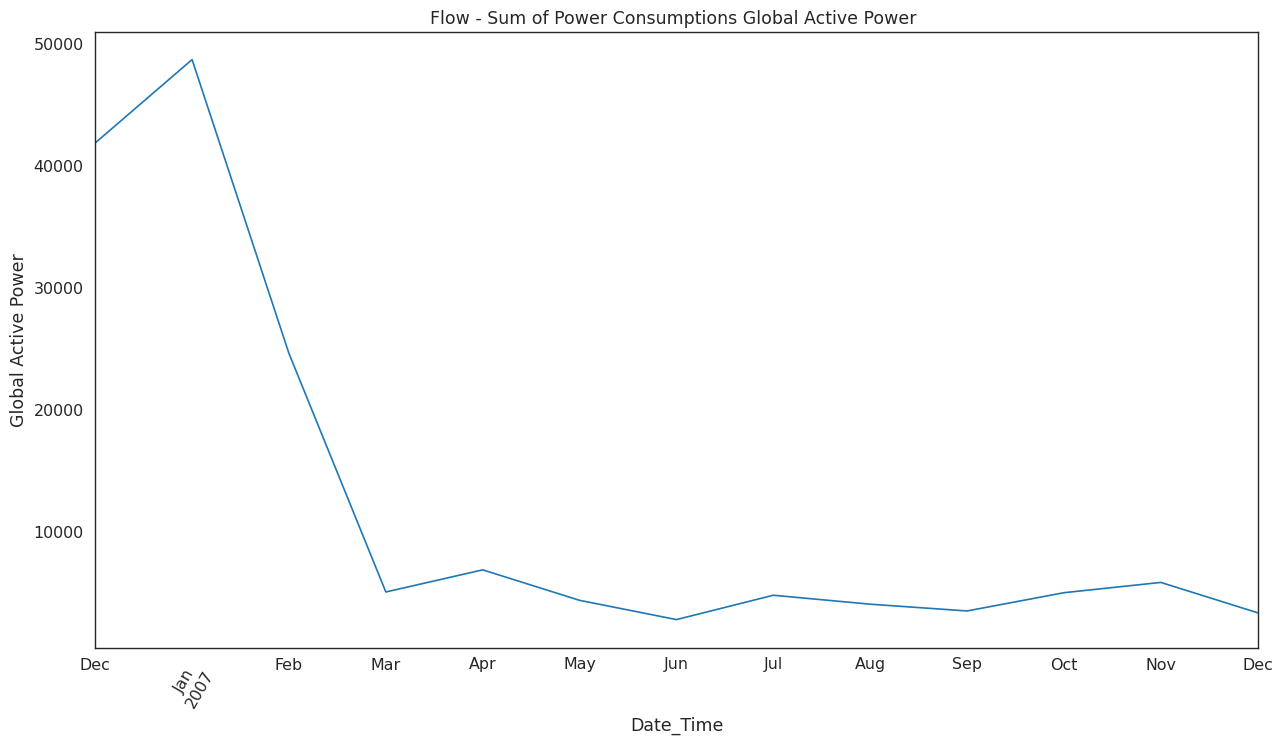

In [42]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').sum().plot(kind='line')  #  Sum of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow - Sum of Power Consumptions Global Active Power ')
plt.show()

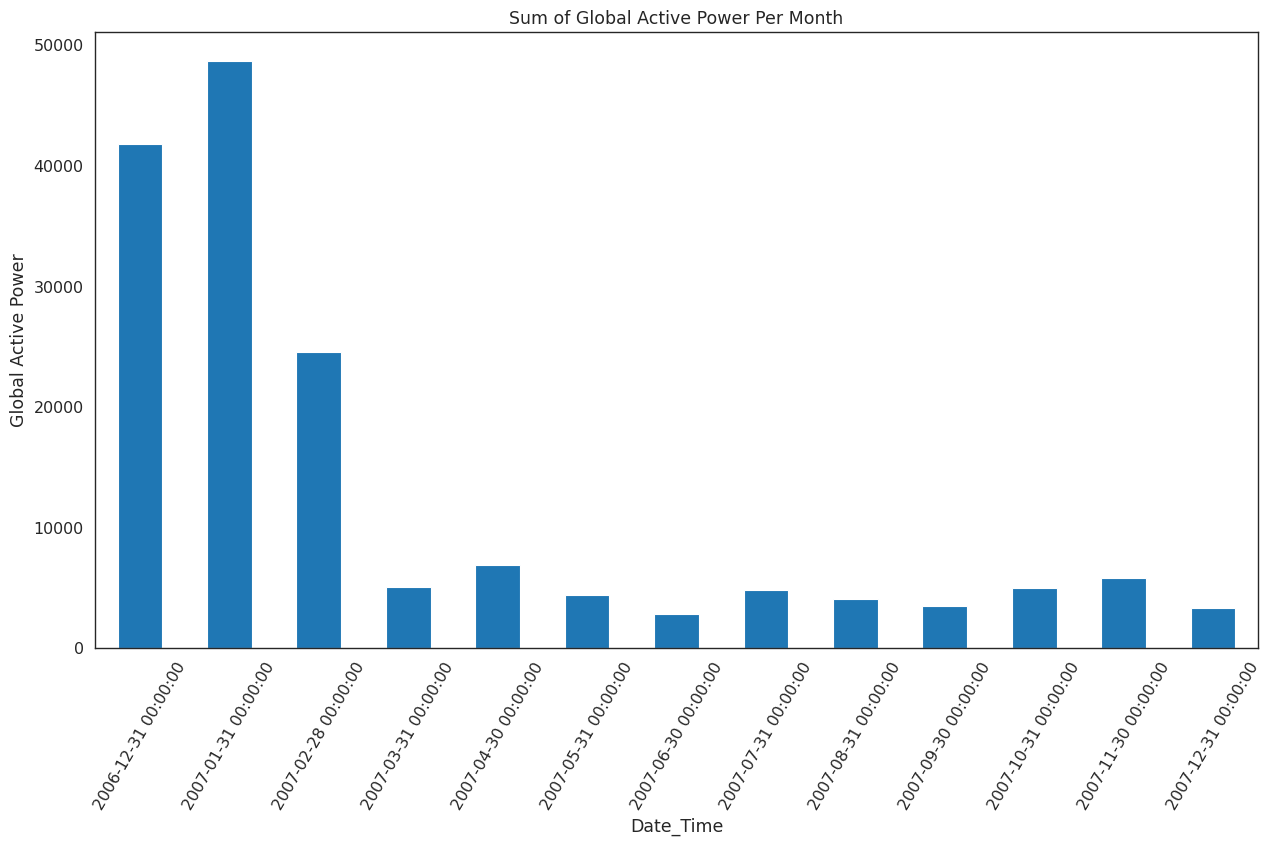

In [43]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').sum().plot(kind='bar')  #  Sum of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Sum of Global Active Power Per Month')
plt.show()

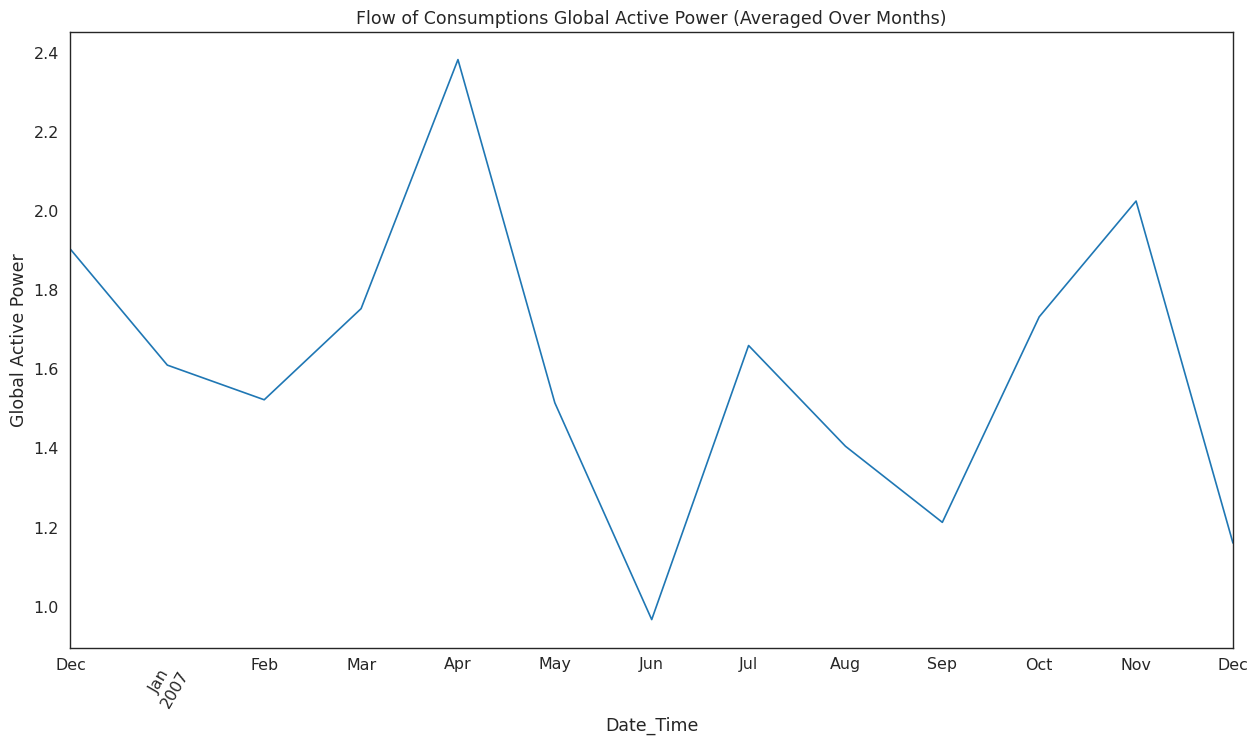

In [44]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').mean().plot(kind='line')  #  Mean of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow of Consumptions Global Active Power (Averaged Over Months)')
plt.show()

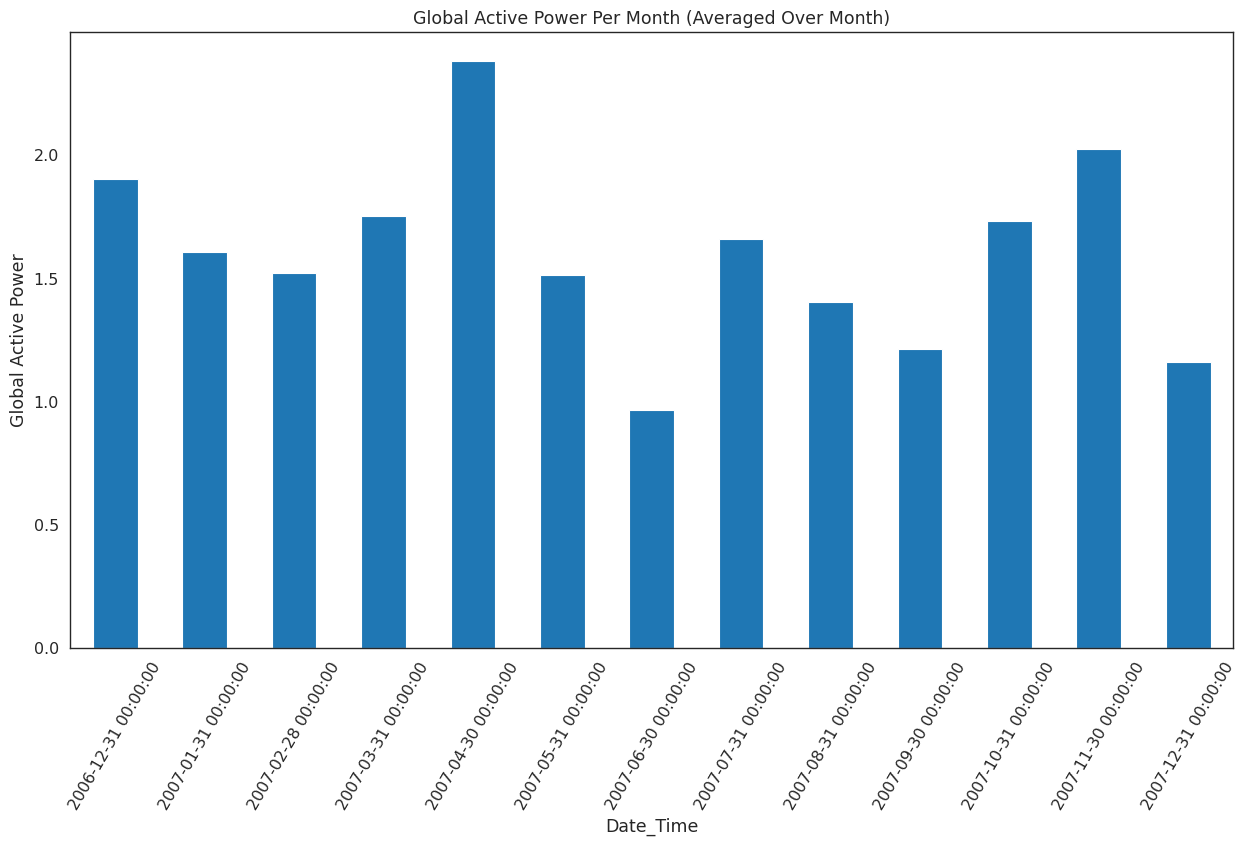

In [45]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').mean().plot(kind='bar')  #  Mean of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Month (Averaged Over Month)')
plt.show()

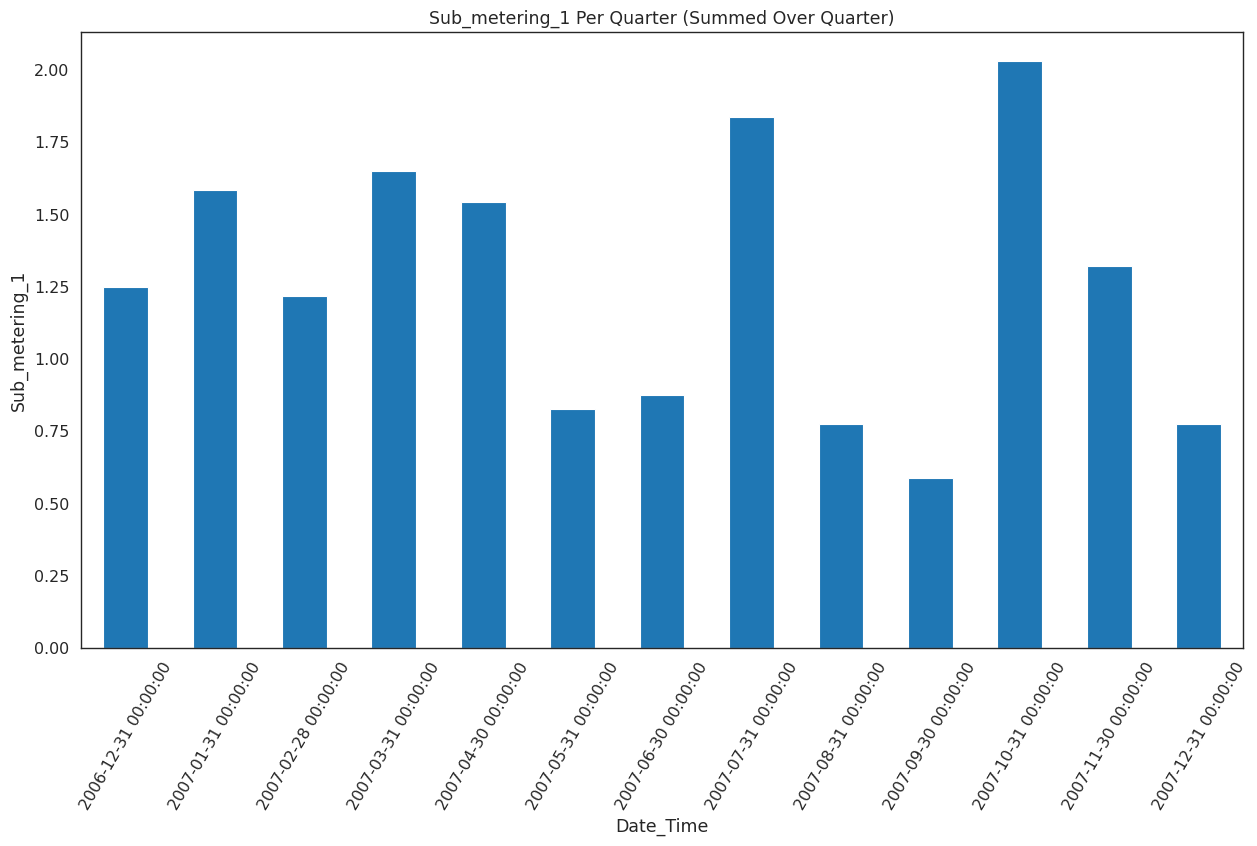

In [46]:
plt.figure(figsize=(15,8))
power['Sub_metering_1'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 Per Quarter (Summed Over Quarter)')
plt.show()

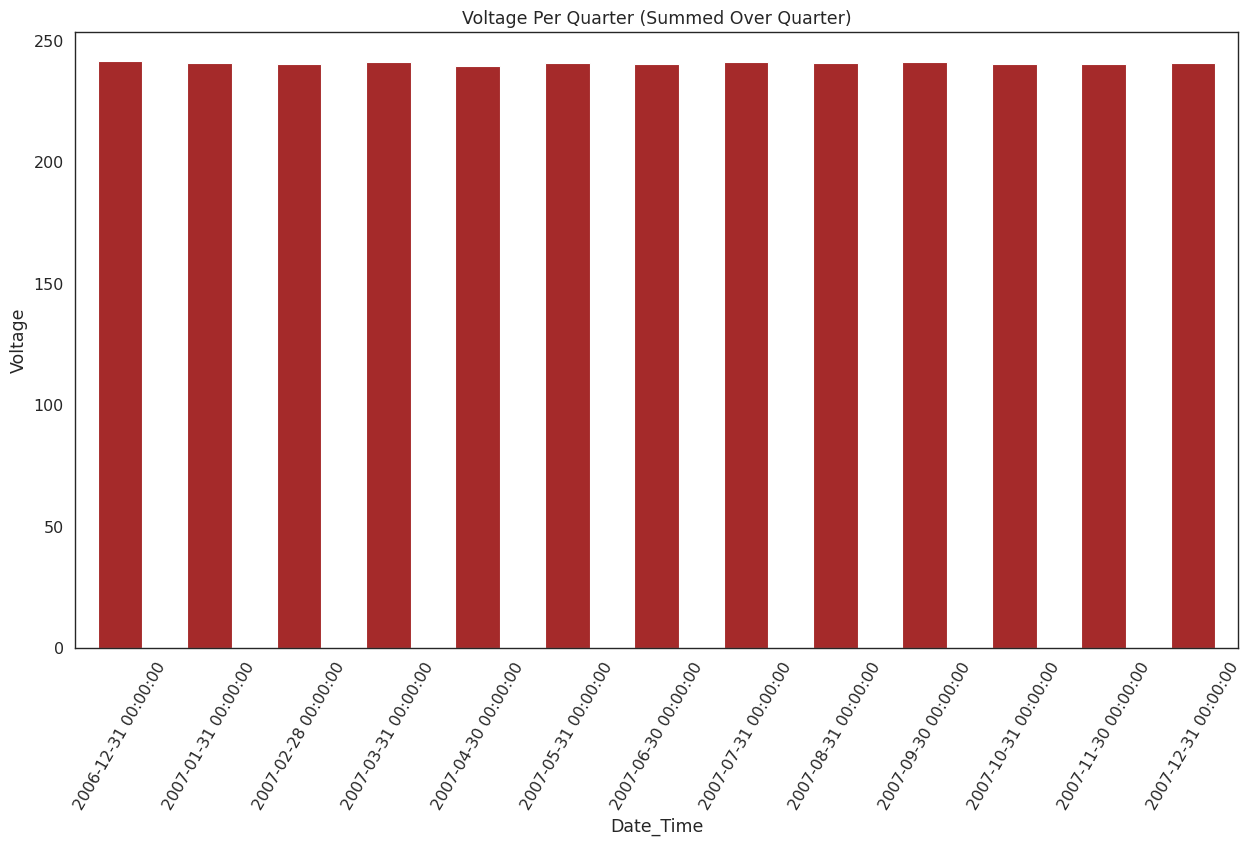

In [47]:
plt.figure(figsize=(15,8))
power['Voltage'].resample('M').mean().plot(kind='bar', color='brown')  #  Mean of 'Voltage' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage Per Quarter (Summed Over Quarter)')
plt.show()

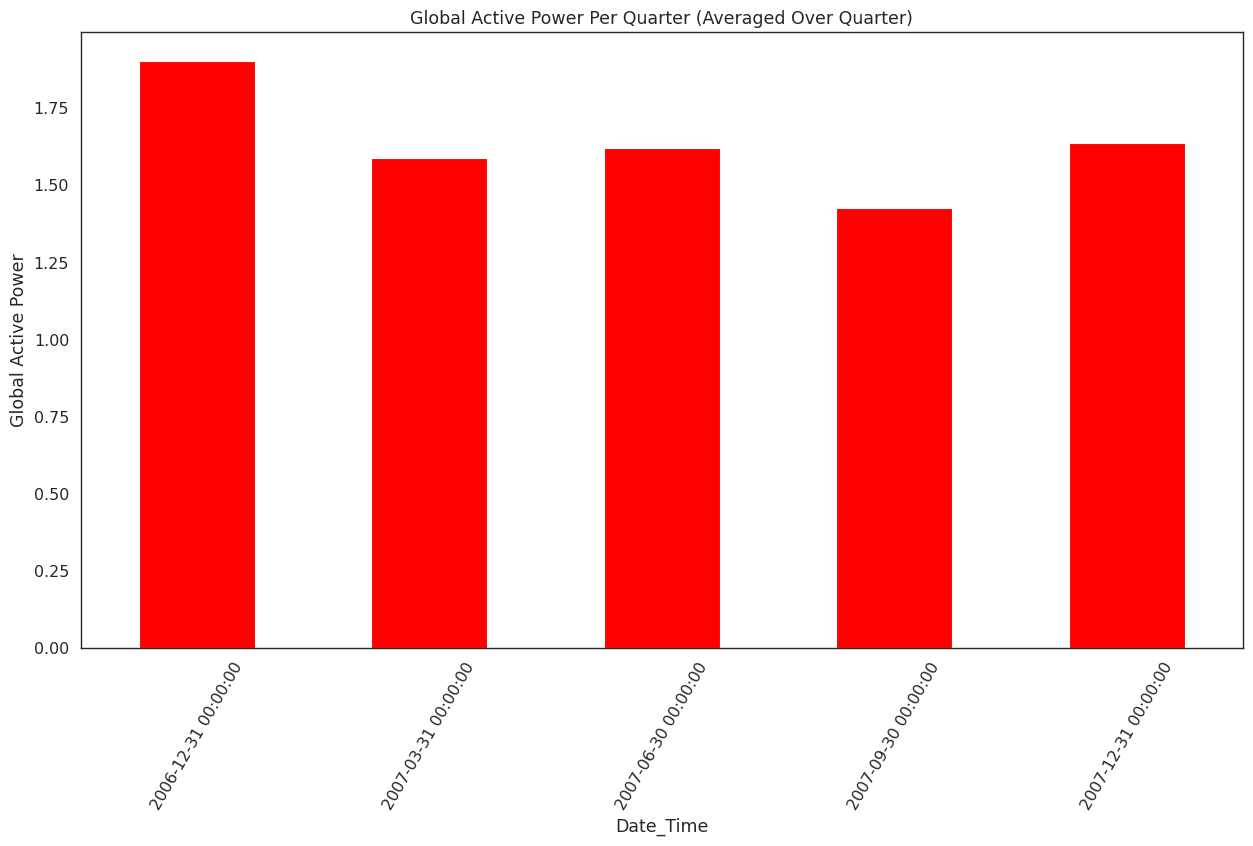

In [48]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('Q').mean().plot(kind='bar', color='red')  #  Mean of 'Global_active_power' Resampled Over Quarter
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Quarter (Averaged Over Quarter)')
plt.show()

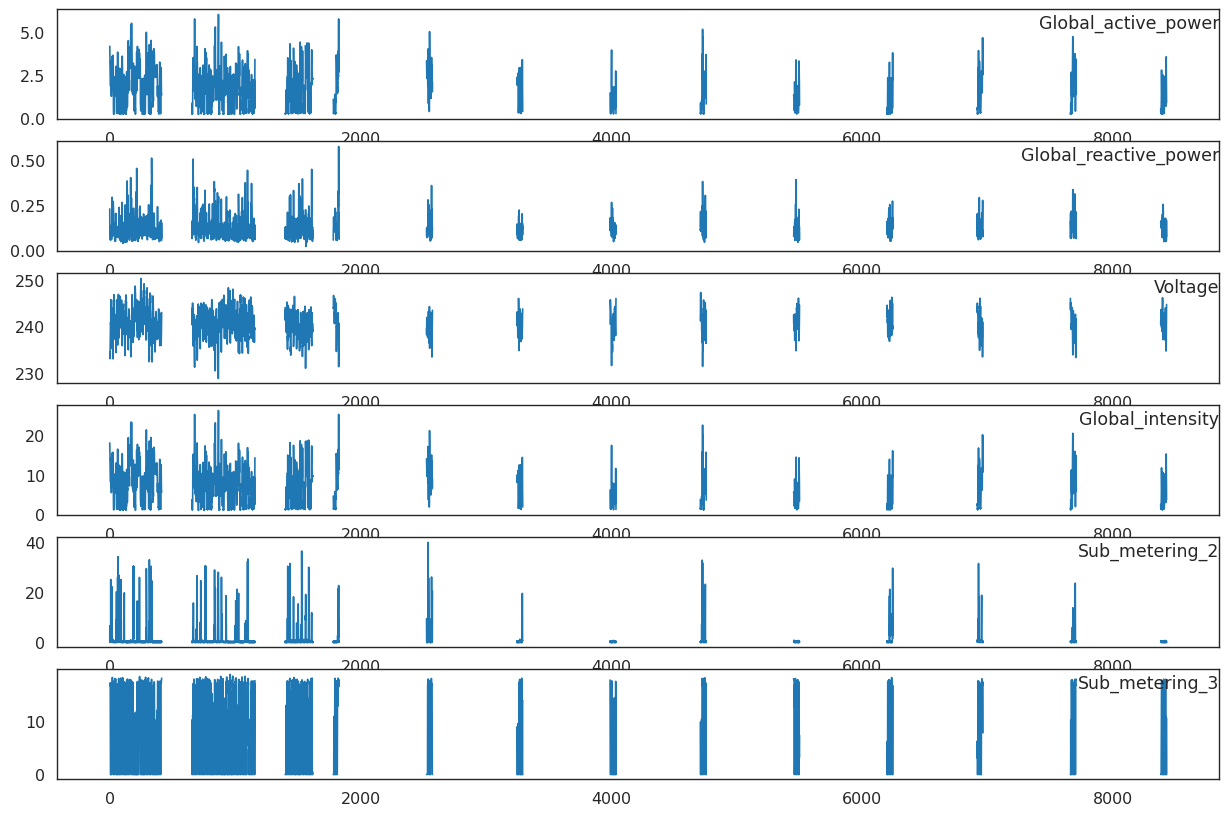

In [49]:
#  Resampling Over Hour & Computing Mean
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('h').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [50]:
#  Dropping Feature: Voltage
power.drop(['Voltage'],1,inplace=True)

In [186]:
def data_prep(data, n_in=1, n_out=1, dropnan=True, fillnan=None):
    names, cols = list(), list()
    data_frame = pd.DataFrame(data)
    n = 1 if type(data) is list else data.shape[1]

    for x in range(n_in, 0, -1):  #  Input Sequence (t-n, ... t-1)
        cols.append(data_frame.shift(x))
        names += [('var%d(t-%d)' % (y+1, x)) for y in range(n)]

    for x in range(0, n_out):  #  Forecast Sequence (t, t+1, ... t+n)
        cols.append(data_frame.shift(-x))
        if x == 0:
            names += [('var%d(t)' % (y+1)) for y in range(n)]
        else:
            names += [('var%d(t+%d)' % (y+1, x)) for y in range(n)]

    z = pd.concat(cols, axis=1)  #  Putting It All Together
    z.columns = names

    if dropnan:  #  Dropping Rows With NaN Values
        z.dropna(inplace=True)

    if fillnan!=None:  #  Filling Rows With NaN Values
        z.fillna(fillnan,inplace=True)
    return z

In [187]:
#  Resampling of Data Over Hour
over_hour = power.resample('h').mean()
over_hour.shape

(8431, 6)

In [188]:
over_hour.tail()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2007-12-02 19:00:00,2.255633,0.171767,9.663333,0.000000,0.316667,0.000000
2007-12-02 20:00:00,3.605567,0.079733,15.320000,8.016667,0.450000,10.866667
2007-12-02 21:00:00,2.354133,0.054133,9.876667,1.183333,0.000000,3.466667
2007-12-02 22:00:00,0.948333,0.165333,4.093333,8.616667,0.550000,0.000000
2007-12-02 23:00:00,0.919967,0.075900,3.763333,0.000000,0.100000,10.533333


In [189]:
#  Training Based On The Resampled Data (Over Hour)
results = over_hour.values

In [190]:
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results)
s.shape

(8431, 6)

In [191]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1, dropnan=False, fillnan=0)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head(10))
print(r.shape)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
0   0.000000   0.000000   0.000000        0.0   0.000000   0.000000  0.682185
1   0.682185   0.375233   0.675010        0.0   0.013178   0.897663  0.580911
2   0.580911   0.106453   0.576209        0.0   0.167707   0.897959  0.541140
3   0.541140   0.115836   0.532868        0.0   0.035789   0.888199  0.518565
4   0.518565   0.097552   0.509683        0.0   0.000000   0.893523  0.482201
5   0.482201   0.100379   0.475300        0.0   0.010404   0.916593  0.335381
6   0.335381   0.063391   0.336056        0.0   0.003329   0.236025  0.311630
7   0.311630   0.090936   0.311290        0.0   0.002081   0.000000  0.280917
8   0.280917   0.146870   0.280859        0.0   0.011652   0.000000  0.532424
9   0.532424   0.209118   0.522724        0.0   0.630046   0.000000  0.230305
(8431, 7)


In [192]:
#  Splitting Into Train & Test Sets
results = r.values

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(results[:, :-1], results[:, -1], test_size=0.10)
# train = results[:duration, :]
# test = results[duration:, :]

In [194]:
#  Splitting Into Input & Outputs
# X_train, y_train = train[:, :-1], train[:, -1]
# X_test, y_test = test[:, :-1], test[:, -1]

In [195]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  #  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7587, 1, 6) (7587,) (844, 1, 6) (844,)


In [196]:
print ('X_train Shape : ',X_train.shape)
print ('y_train Shape : ',y_train.shape)
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_train Shape :  (7587, 1, 6)
y_train Shape :  (7587,)
X_test Shape :  (844, 1, 6)
y_test Shape :  (844,)


In [197]:
#  LSTM Model Architecture
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

In [198]:
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [199]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 200)            165600    
                                                                 
 dropout_16 (Dropout)        (None, 1, 200)            0         
                                                                 
 lstm_17 (LSTM)              (None, 200)               320800    
                                                                 
 dropout_17 (Dropout)        (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 486601 (1.86 MB)
Trainable params: 486601 (1.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
#  Fitting Network
history = model.fit(X_train, y_train, epochs = 100, batch_size = 70, validation_data = (X_test, y_test), verbose = 2, shuffle = False)

Epoch 1/100
109/109 - 5s - loss: 0.0062 - val_loss: 0.0034 - 5s/epoch - 46ms/step
Epoch 2/100
109/109 - 1s - loss: 0.0036 - val_loss: 0.0030 - 728ms/epoch - 7ms/step
Epoch 3/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0029 - 777ms/epoch - 7ms/step
Epoch 4/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0030 - 581ms/epoch - 5ms/step
Epoch 5/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0029 - 625ms/epoch - 6ms/step
Epoch 6/100
109/109 - 1s - loss: 0.0035 - val_loss: 0.0030 - 572ms/epoch - 5ms/step
Epoch 7/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0030 - 597ms/epoch - 5ms/step
Epoch 8/100
109/109 - 1s - loss: 0.0033 - val_loss: 0.0030 - 752ms/epoch - 7ms/step
Epoch 9/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0029 - 858ms/epoch - 8ms/step
Epoch 10/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0029 - 845ms/epoch - 8ms/step
Epoch 11/100
109/109 - 1s - loss: 0.0034 - val_loss: 0.0029 - 646ms/epoch - 6ms/step
Epoch 12/100
109/109 - 1s - loss: 0.0033 - val_loss: 0.0029 - 606ms/epoch - 

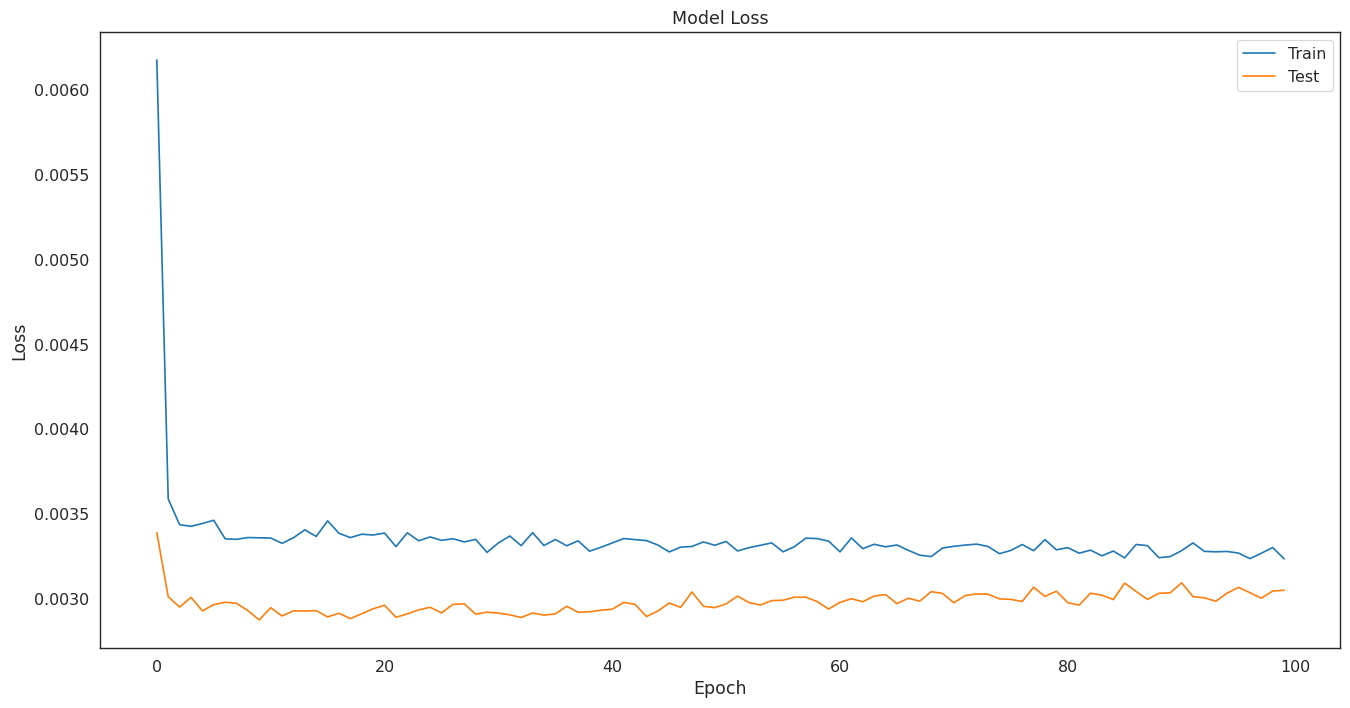

In [201]:
#  Summarizing History For Loss
plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [202]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))

27/27 [==============================] - 1s 2ms/step


In [203]:
#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]

In [204]:
#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [205]:
#  Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

Test RMSE : 0.322


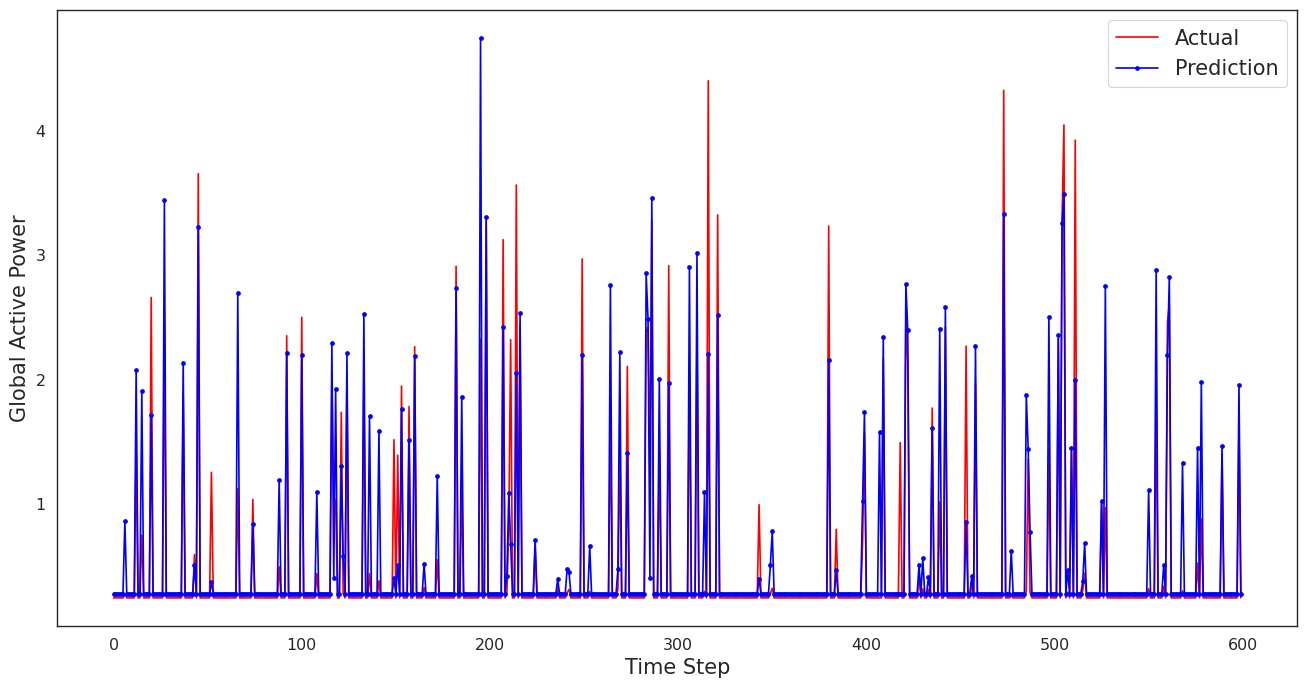

In [206]:
#  Every Time Step is One Hour
#  Compairing The Predictions In 600 Hours
pq = [x for x in range(600)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:600], 'r', label="Actual")
plt.plot(pq, y_pred_i[:600], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()

In [227]:
results = results.reshape(-1, results.shape[-1])
print(results.shape)
X_train, X_test, y_train, y_test = train_test_split(results[:, :-1], results[:, -1], test_size=0.20)

(8431, 7)


In [228]:
ridge_model = Ridge()
ridge_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_model, ridge_params, cv=3, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)
best_ridge = ridge_search.best_estimator_
ridge_predictions = best_ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Ridge - Best Params: {ridge_search.best_params_}, RMSE: {ridge_rmse}")


Ridge - Best Params: {'alpha': 0.1}, RMSE: 0.056959403194635765


In [229]:
gb_model = GradientBoostingRegressor()
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4]}
gb_search = GridSearchCV(gb_model, gb_params, cv=3, scoring='neg_mean_squared_error')
gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_
gb_predictions = best_gb.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
print(f"GradientBoosting - Best Params: {gb_search.best_params_}, RMSE: {gb_rmse}")

GradientBoosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, RMSE: 0.05766866483131245


In [230]:
rf_model = RandomForestRegressor()
rf_params = {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10]}
rf_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
rf_predictions = best_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"RandomForest - Best Params: {rf_search.best_params_}, RMSE: {rf_rmse}")


RandomForest - Best Params: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 5}, RMSE: 0.05604146923724474


In [231]:
svr_model = SVR()
svr_params = {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf', 'poly']}
svr_search = RandomizedSearchCV(svr_model, svr_params, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svr_search.fit(X_train, y_train)
best_svr = svr_search.best_estimator_
svr_predictions = best_svr.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print(f"SVR - Best Params: {svr_search.best_params_}, RMSE: {svr_rmse}")


SVR - Best Params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}, RMSE: 0.10101353859966787


In [232]:
mlp_model = MLPRegressor()
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.05]}
mlp_search = RandomizedSearchCV(mlp_model, mlp_params, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
mlp_search.fit(X_train, y_train)
best_mlp = mlp_search.best_estimator_
mlp_predictions = best_mlp.predict(X_test)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_predictions))
print(f"MLPRegressor - Best Params: {mlp_search.best_params_}, RMSE: {mlp_rmse}")


MLPRegressor - Best Params: {'solver': 'adam', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}, RMSE: 0.05713054236597519


In [233]:
# ARIMA Model
arima_model = ARIMA(y_train, order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=len(y_test))
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 0.13021417554268028


In [225]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)
lstm_predictions = lstm_model.predict(X_test).flatten()
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f"LSTM RMSE: {lstm_rmse}")

Epoch 1/50
106/106 - 6s - loss: 0.0084 - val_loss: 0.0043 - 6s/epoch - 52ms/step
Epoch 2/50
106/106 - 2s - loss: 0.0041 - val_loss: 0.0038 - 2s/epoch - 23ms/step
Epoch 3/50
106/106 - 2s - loss: 0.0038 - val_loss: 0.0036 - 2s/epoch - 14ms/step
Epoch 4/50
106/106 - 1s - loss: 0.0037 - val_loss: 0.0037 - 1s/epoch - 11ms/step
Epoch 5/50
106/106 - 1s - loss: 0.0036 - val_loss: 0.0033 - 1s/epoch - 11ms/step
Epoch 6/50
106/106 - 1s - loss: 0.0036 - val_loss: 0.0032 - 1s/epoch - 12ms/step
Epoch 7/50
106/106 - 1s - loss: 0.0035 - val_loss: 0.0032 - 1s/epoch - 11ms/step
Epoch 8/50
106/106 - 1s - loss: 0.0036 - val_loss: 0.0031 - 1s/epoch - 12ms/step
Epoch 9/50
106/106 - 1s - loss: 0.0036 - val_loss: 0.0031 - 1s/epoch - 11ms/step
Epoch 10/50
106/106 - 1s - loss: 0.0036 - val_loss: 0.0030 - 1s/epoch - 12ms/step
Epoch 11/50
106/106 - 2s - loss: 0.0035 - val_loss: 0.0034 - 2s/epoch - 15ms/step
Epoch 12/50
106/106 - 2s - loss: 0.0035 - val_loss: 0.0031 - 2s/epoch - 23ms/step
Epoch 13/50
106/106 - 1s 